## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Based on the dataset #Weratedogs, there are some insights is found during the analysis:
1. The largest retweet counts and favorite counts in the We Rate Dog archive, filtered only the rating available are 70k, 143k respectively.
2. The average point of dog rating is 1.22 which is calculated by rating numerator divided by rating denominator is 1.22 which means the rating system allows more and more tweets having numerator greater than denominator. 
3. The prediction rate predict 2073 images, in which the rate for all True rate is 0.6, at least one True rate is 0.8. In the archive WeRateDog, the number of predictions of images with rating is more than half of the total images predicted. The number of images is not dog predicted True is 415 images (account for 20%)

In this analysis, our interest is to find the relationship between the rating point rating numerator/rating denominator) and the number of retweets or number of favorites. 
In the analysis, due to the rating point data has many outliers, so that I divide the dataset into 2 parts, (1) excluding outliers, (2) only outliers for visible visualization and maintain the interpretable insight and trend. 
The 1st column in the chart is used for not oulier data, a clear positive trend is easily visible. 

**The result displays a slight positive relationship between rating point and number of retweets or favorites, which means that if the tweet has the higher rating, the chance it will be retweeted or liked will be higher**.

In [7]:
# data set up
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
master = pd.read_csv(r'C:\Users\DE\Documents\Data wrangling_Udacity\twitter_archive_master.csv')
master_1 = master.drop_duplicates('tweet_id')
# create rate point column
master_1['rate_point'] = master_1['rating_numerator']/master_1['rating_denominator'];

C:\Users\DE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Retweet count for rate point > 2 (outlier)')

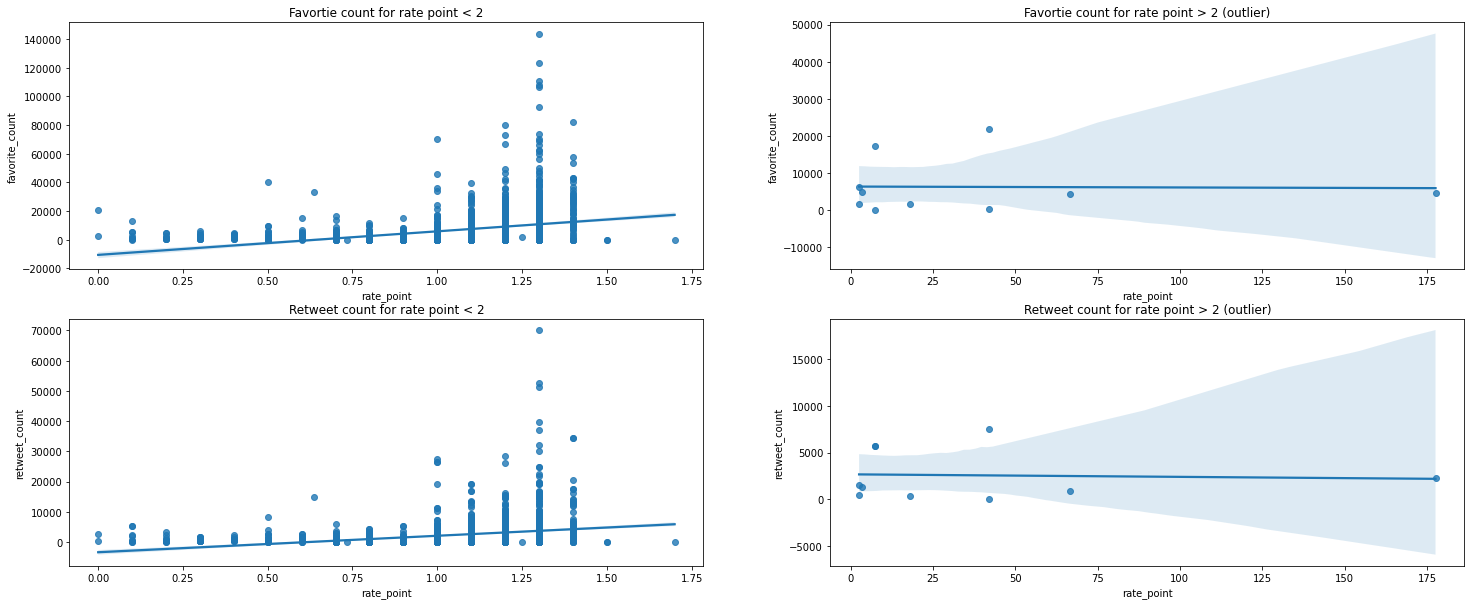

In [8]:
# create fig and add subplot
fix = plt.figure(figsize=(25,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

# regplot
sb.regplot(data=master_1[master_1.rate_point<2], x='rate_point',y='favorite_count', fit_reg=True, ax=ax1)
ax1.set_title('Favortie count for rate point < 2')

sb.regplot(data=master_1[master_1.rate_point<2], x='rate_point',y='retweet_count', fit_reg=True, ax=ax3)
ax3.set_title('Retweet count for rate point < 2')

sb.regplot(data=master_1[master_1.rate_point>2], x='rate_point',y='favorite_count', fit_reg=True, ax=ax2)
ax2.set_title('Favortie count for rate point > 2 (outlier)')

sb.regplot(data=master_1[master_1.rate_point>2], x='rate_point',y='retweet_count', fit_reg=True, ax=ax4)
ax4.set_title('Retweet count for rate point > 2 (outlier)')